In [1]:
users = [    { "id": 0, "name": "Hero" },    { "id": 1, "name": "Dunn" },    { "id": 2, "name": "Sue" },    { "id": 3, "name": "Chi" },    { "id": 4, "name": "Thor" },    { "id": 5, "name": "Clive" },    { "id": 6, "name": "Hicks" },    { "id": 7, "name": "Devin" },    { "id": 8, "name": "Kate" },    { "id": 9, "name": "Klein" }]

In [2]:
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [3]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [4]:
friendship_pairs

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [13]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [14]:
# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    print(f"reading friendship_pairs ({i},{j})")
    friendships[i].append(j)  # Add j as a friend of user i    
    friendships[j].append(i)  # Add i as a friend of user j

friendship_pairs (0,1)
friendship_pairs (0,2)
friendship_pairs (1,2)
friendship_pairs (1,3)
friendship_pairs (2,3)
friendship_pairs (3,4)
friendship_pairs (4,5)
friendship_pairs (5,6)
friendship_pairs (5,7)
friendship_pairs (6,8)
friendship_pairs (7,8)
friendship_pairs (8,9)


Lets create this network figure
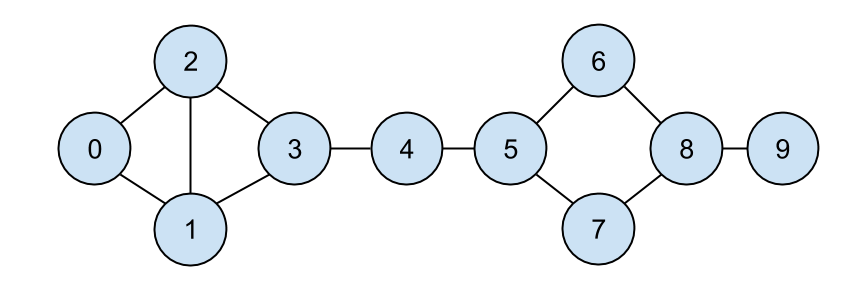

In [7]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [35]:
def number_of_friends(user):    
    """How many friends does _user_ have?"""    
    user_id = user["id"]    
    friend_ids = friendships[user_id]
    print(f"user[id]={user_id} has {len(friend_ids)} friend's")
    return len(friend_ids)

### Calculate the number of connections in the network

In [40]:
#Sum each node to get total of network connections
print("Reading the network\n")
total_network_connections = sum(number_of_friends(user) for user in users)
print(f"\ntotal_network_connections= {total_network_connections}")

Reading the network

user[id]=0 has 2 friend's
user[id]=1 has 3 friend's
user[id]=2 has 3 friend's
user[id]=3 has 3 friend's
user[id]=4 has 2 friend's
user[id]=5 has 3 friend's
user[id]=6 has 2 friend's
user[id]=7 has 2 friend's
user[id]=8 has 3 friend's
user[id]=9 has 1 friend's

total_network_connections= 24


### Calculate the average user connection

In [42]:
num_users = len(users)                            # length of the users list
avg_connections = total_connections / num_users   # 24 / 10 == 2.4
print(f"Total of users in the network = {num_users}")
print(f"Average of connections {avg_connections}")

Total of users in the network = 10
Average of connections 2.4


### Create a list of users with the total of friends

In [44]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) 
                     for user in users]

print(num_friends_by_id)

user[id]=0 has 2 friend's
user[id]=1 has 3 friend's
user[id]=2 has 3 friend's
user[id]=3 has 3 friend's
user[id]=4 has 2 friend's
user[id]=5 has 3 friend's
user[id]=6 has 2 friend's
user[id]=7 has 2 friend's
user[id]=8 has 3 friend's
user[id]=9 has 1 friend's
[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


### Sorted List

In [45]:
num_friends_by_id.sort(# Sort the list
    key=lambda id_and_friends: id_and_friends[1],   # by num_friends
    reverse=True)  # largest to smallest                                 

In [47]:
print(f"Sorted list descend order by number of friends {num_friends_by_id}")

Sorted list descend order by number of friends [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


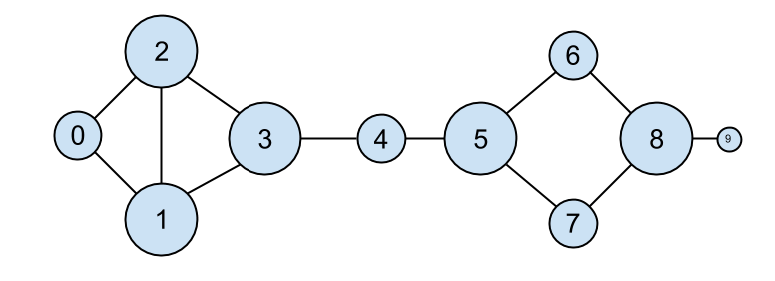

### Print the friends of a friend

In [49]:
def foaf_ids_bad(user):    
    """foaf is short for "friend of a friend" """    
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

In [60]:
print(foaf_ids_bad(users[3]))

[0, 2, 3, 0, 1, 3, 3, 5]


### When print all the friends from users[3] , there are couple things happing
### 1) users 3 is showing 3 times
### 2) users 0 is showing twice
### The function counter will count how many times a value appear in a list 
### For this case we will count only users that are not myself and are not my friend.

In [57]:
from collections import Counter

In [58]:
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )

### User [0] and User[5] are not my friend but they are friend of User[1], User[3] and User[4]

In [59]:
print(friends_of_friends(users[3])) 

Counter({0: 2, 5: 1})


## List of interest by user

In [61]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [62]:
print(interests)

[(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'), (1, 'Postgres'), (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'), (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'), (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')]


### Print a list of data scientist which like Python

In [66]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [67]:
print(data_scientists_who_like("Python"))

[2, 3, 5]


### Build a list of index to faciliate the search

In [68]:
from collections import defaultdict

### Generate an empty list

In [72]:
# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
print(user_ids_by_interest)

defaultdict(<class 'list'>, {})


### Loop through the interests list and generate a new list showing the <Technology, Number of users interested>

In [73]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

### See the results

In [74]:
print(user_ids_by_interest)

defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})


### Generate an empty list

In [75]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

### Loop through the interests list and generate a new list showing the <User,Technology>

In [76]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

### See the results

In [77]:
print(interests_by_user_id)

defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


### Print all the users that has the same interests

In [78]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

### list the technologies

In [79]:
print(most_common_interests_with(users[0]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})
